# Task 1: Data Analysis and Preprocessing

This notebook covers:
- Handling missing values
- Data cleaning
- Exploratory Data Analysis (EDA)
- Geolocation merging
- Feature engineering
- Data transformation (class imbalance, scaling, encoding)

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import ipaddress
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [14]:
fraud_df = pd.read_csv('../data/Fraud_Data.csv')
ip_df = pd.read_csv('../data/IpAddress_to_Country.csv')
cc_df = pd.read_csv('../data/creditcard.csv')


In [11]:
fraud_df.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_int,country,transaction_count,hour_of_day,day_of_week,time_since_signup
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,NaN,Unknown,1,2,5,1251.856111
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,NaN,Unknown,1,1,0,4.984444
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,NaN,Unknown,1,18,3,0.000278
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,Unknown,1,13,0,136.690278
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,NaN,Unknown,1,18,2,1211.516944
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,NaN,Unknown,1,8,3,1178.036389
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0,NaN,Unknown,1,3,3,604.951389
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0,NaN,Unknown,1,17,0,1185.758056
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0,NaN,Unknown,1,14,1,998.388889
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0,NaN,Unknown,1,23,0,1373.264722


In [15]:
ip_df.head(5)

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [16]:
cc_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Handle Missing Values

In [5]:
# Check missing values
print('Fraud_Data missing values:')
print(fraud_df.isnull().sum())
print('\nIpAddress_to_Country missing values:')
print(ip_df.isnull().sum())
print('\nCreditcard missing values:')
print(cc_df.isnull().sum())

# Drop rows with missing values for simplicity
fraud_df = fraud_df.dropna()
ip_df = ip_df.dropna()
cc_df = cc_df.dropna()

Fraud_Data missing values:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

IpAddress_to_Country missing values:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

Creditcard missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## Data Cleaning

In [6]:
# Remove duplicates
fraud_df = fraud_df.drop_duplicates()
ip_df = ip_df.drop_duplicates()
cc_df = cc_df.drop_duplicates()

# Correct data types
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])
fraud_df['age'] = fraud_df['age'].astype(int)

## Exploratory Data Analysis (EDA)

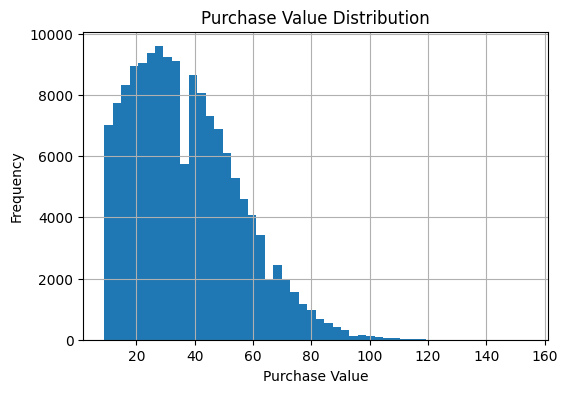

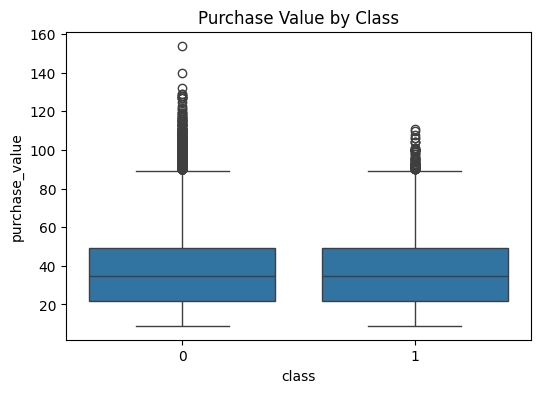

In [7]:
# Univariate analysis
plt.figure(figsize=(6,4))
fraud_df['purchase_value'].hist(bins=50)
plt.title('Purchase Value Distribution')
plt.xlabel('Purchase Value')
plt.ylabel('Frequency')
plt.show()

# Bivariate analysis
plt.figure(figsize=(6,4))
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title('Purchase Value by Class')
plt.show()

## Merge Datasets for Geolocation Analysis

In [8]:
# Convert IP addresses to integer
def ip_to_int(ip):
    try:
        return int(ipaddress.IPv4Address(ip))
    except:
        return np.nan

fraud_df['ip_int'] = fraud_df['ip_address'].apply(ip_to_int)
ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].apply(ip_to_int)
ip_df['upper_bound_ip_address'] = ip_df['upper_bound_ip_address'].apply(ip_to_int)

# Merge: assign country to each transaction
def find_country(ip):
    row = ip_df[(ip_df['lower_bound_ip_address'] <= ip) & (ip_df['upper_bound_ip_address'] >= ip)]
    if not row.empty:
        return row.iloc[0]['country']
    return 'Unknown'

fraud_df['country'] = fraud_df['ip_int'].apply(find_country)

## Feature Engineering

In [9]:
# Transaction frequency per user
user_freq = fraud_df.groupby('user_id').size().rename('transaction_count')
fraud_df = fraud_df.merge(user_freq, on='user_id')

# Time-based features
fraud_df['hour_of_day'] = fraud_df['purchase_time'].dt.hour
fraud_df['day_of_week'] = fraud_df['purchase_time'].dt.dayofweek
fraud_df['time_since_signup'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds() / 3600

## Data Transformation and avoid class imbalance


In [ ]:
# Analyze class imbalance
print('Class distribution:')
print(fraud_df['class'].value_counts())

# Prepare features: drop identifiers and non-numeric columns
drop_cols = ['class', 'ip_address', 'signup_time', 'purchase_time', 'user_id', 'device_id', 'ip_int']
X = fraud_df.drop(drop_cols, axis=1)
y = fraud_df['class']

# One-hot encode categorical features
categorical = ['source', 'browser', 'sex', 'country']
X = pd.get_dummies(X, columns=categorical, drop_first=True)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print('After SMOTE:', np.bincount(y_train_res))